# [【SOTA】マイナビ × SIGNATE Student Cup 2019: 賃貸物件の家賃予測](https://signate.jp/competitions/264)

## 1. データ準備

### 1.1. データ読込

In [287]:
import pandas as pd
import numpy as np
import pathlib
import os

# 学習データ、テストデータの読み込み
train_path = pathlib.Path("./DATA/train.csv")
test_path = pathlib.Path("./DATA/test.csv")

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [288]:
train_data.head()

,id,賃料,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,9年9ヶ月,南東,20.01m2,1階／12階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCATV／\tCSアンテナ／\tBSアンテナ,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,RC（鉄筋コンクリート）,2年間
1,2,76000,東京都中央区月島３丁目,都営大江戸線\t勝どき駅\t徒歩5分\t\t有楽町線\t月島駅\t徒歩9分\t\t日比谷線\...,1R,44年10ヶ月,NaN,16.5m2,5階／10階建,専用トイレ／\tシャワー／\t温水洗浄便座,ガスコンロ／\tシステムキッチン\t／\t給湯,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置場／\t敷...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【スーパー】 1283m,鉄骨造,2年間
2,3,110000,東京都渋谷区笹塚２丁目,京王線\t笹塚駅\t徒歩6分\t\t京王線\t代田橋駅\t徒歩7分\t\t京王線\t明大前駅...,1K,8年6ヶ月,南,22.05m2,12階／15階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\t光ファイバー／\tCSアンテナ／\tBSアンテナ,エアコン付\tウォークインクローゼット\tシューズボックス／\tバルコニー／\tフローリング...,"駐輪場\t空有\tバイク置き場\t空有\t駐車場\t近隣\t30,000円(税込)\t距離100m",【スーパー】 89m\t【コンビニ】 184m\t【コンビニ】 392m\t【スーパー】 492m,RC（鉄筋コンクリート）,2年間
3,4,150000,東京都杉並区高円寺南２丁目23-2,総武線・中央線（各停）\t高円寺駅\t徒歩9分\t\t丸ノ内線(池袋－荻窪)\t新高円寺駅\...,2LDK,29年4ヶ月,南,60.48m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー,エアコン付\tシューズボックス／\tバルコニー／\t2面採光／\t室内洗濯機置場／\tエレベ...,駐車場\t無\t駐輪場\t無\tバイク置き場\t無,【スーパー】 225m\t【スーパー】 448m\t【スーパー】 619m\t【スーパー】 ...,RC（鉄筋コンクリート）,2年間\t※この物件は\t定期借家\tです。
4,5,74000,東京都葛飾区金町３丁目7-2,京成金町線\t京成金町駅\t徒歩5分\t\t常磐線\t金町(東京都)駅\t徒歩7分\t\t京...,2DK,31年7ヶ月,南,39.66m2,1階／2階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能,給湯／\t独立キッチン,NaN,バルコニー／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水,"駐車場\t近隣\t17,000円(税込)\t距離300m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 193m\t【スーパー】 298m\t【スーパー】 660m\t【スーパー】 ...,木造,2年間


## 2. 前処理

### 2.1. データ選択

In [289]:
train_data_1 = train_data[["id", "所在地", "賃料", "間取り", "築年数","方角", "面積", "所在階", "建物構造"]]
test_data_1 = test_data[["id", "所在地", "間取り", "築年数","方角",  "面積", "所在階", "建物構造"]]

### 2.2. 間取りの数値化

In [290]:
# 16m2で11R扱いの物件を1Rに修正する
# test_data.loc[test_data["間取り"]=="11R"]
test_data_1 = test_data_1.replace("11R", "1R")

In [291]:
# 間取りにlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["間取り"],test_data_1["間取り"]]))

train_data_1["間取りID"] = le.transform(train_data_1["間取り"])
test_data_1["間取りID"] = le.transform(test_data_1["間取り"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### 2.3. 面積の数値化

In [292]:
# 面積のカラムタイトルを面積[m2]に置換
train_data_1 = train_data_1.rename(columns={"面積": "面積m2"})
test_data_1 = test_data_1.rename(columns={"面積": "面積m2"})

In [293]:
# カラムタイトル面積[m2]の要素からm2を削除
train_data_1['面積m2'] = train_data_1['面積m2'].str.replace('m2', '').astype(float)
test_data_1['面積m2'] = test_data_1['面積m2'].str.replace('m2', '').astype(float)

### 2.4. 所在階の数値化

In [294]:
# 所在階が総階数よりも大きい場合、値を入れ替える
train_data_1 = train_data_1.replace("2階／1階建", "1階／2階建")
train_data_1 = train_data_1.replace("4階／2階建", "2階／4階建")
train_data_1 = train_data_1.replace("7階／2階建", "2階／7階建")
train_data_1 = train_data_1.replace("10階／8階建", "8階／10階建")

test_data_1 = test_data_1.replace("2階／1階建", "1階／2階建")
test_data_1 = test_data_1.replace("3階／2階建", "2階／3階建")
test_data_1 = test_data_1.replace("4階／1階建", "1階／4階建")
test_data_1 = test_data_1.replace("4階／2階建", "2階／4階建")
test_data_1 = test_data_1.replace("4階／3階建（地下1階）", "3階／4階建（地下1階）")
test_data_1 = test_data_1.replace("8階／6階建", "6階／8階建")
test_data_1 = test_data_1.replace("13階／4階建（地下1階）", "4階／13階建（地下1階）")
test_data_1 = test_data_1.replace("21階／3階建", "3階／21階建")
test_data_1 = test_data_1.replace("44階／4階建", "4階／44階建")

In [295]:
# 所在階の中身を"／"で2つの列に分割
train_data_1 = pd.concat([train_data_1, train_data_1['所在階'].str.split('／', expand=True)], axis=1)
test_data_1 = pd.concat([test_data_1, test_data_1['所在階'].str.split('／', expand=True)], axis=1)

In [296]:
# 分割した所在階のカラム名変更　0:所在、1:階層
train_data_1 = train_data_1.rename(columns={0:"所在", 1:"階層"})
test_data_1 = test_data_1.rename(columns={0:"所在", 1:"階層"})

In [297]:
# 所在と階層の要素を整形
train_data_1['所在'] = train_data_1['所在'].str.replace('階', '')
train_data_1['所在'] = train_data_1['所在'].str.replace('建', '')
train_data_1['所在'] = train_data_1['所在'].str.replace('地下', '-')
train_data_1['所在'] = train_data_1['所在'].str.replace('\（.*\）', '', regex=True)
train_data_1['階層'] = train_data_1['階層'].str.replace('階建', '')
train_data_1['階層'] = train_data_1['階層'].str.replace('\（.*\）', '', regex=True)
train_data_1['所在'] = train_data_1['所在'].replace('', np.nan)

test_data_1['所在'] = test_data_1['所在'].str.replace('階', '')
test_data_1['所在'] = test_data_1['所在'].str.replace('建', '')
test_data_1['所在'] = test_data_1['所在'].str.replace('地下', '-')
test_data_1['所在'] = test_data_1['所在'].str.replace('\（.*\）', '', regex=True)
test_data_1['階層'] = test_data_1['階層'].str.replace('階建', '')
test_data_1['階層'] = test_data_1['階層'].str.replace('\（.*\）', '', regex=True)
test_data_1['所在'] = test_data_1['所在'].replace('', np.nan)

In [298]:
# # "階層"がNoneの箇所を"所在"の値で埋める
# train_data_1['階層'].fillna(train_data_1['所在'], inplace=True)
# test_data_1['階層'].fillna(test_data_1['所在'], inplace=True)

In [299]:
# 所在と階層の要素をfloat型に変換する
train_data_1['所在'] = train_data_1['所在'].astype(float)
train_data_1['階層'] = train_data_1['階層'].astype(float)

test_data_1['所在'] = test_data_1['所在'].astype(float)
test_data_1['階層'] = test_data_1['階層'].astype(float)

In [300]:
# 所在階のカラムを削除
train_data_1 = train_data_1.drop('所在階', axis=1)
test_data_1 = test_data_1.drop('所在階', axis=1)

In [301]:
# # 所在のNaNを埋める
# train_data_1.loc[train_data_1["所在"].isnull(), "所在"] = train_data_1["階層"]
# test_data_1.loc[test_data_1["所在"].isnull(), "所在"] = test_data_1["階層"]

In [302]:
# # 所在も階層も空欄のデータは間取りと面積の近いデータで埋める
# print(test_data_1[(test_data_1["間取りID"] == 21) & (test_data_1["面積m2"] > 90) & (test_data_1["面積m2"] < 95)].mean())
# test_data_1.loc[test_data_1["id"]==40675, "所在"] = float(6)
# test_data_1.loc[test_data_1["id"]==40675, "階層"] = float(9)

### 2.5. 築年数の数値化

In [303]:
# 新築の場合は全て0にする
train_data_1.loc[train_data_1["築年数"]=="新築", "築年数"] = float(0)
test_data_1.loc[test_data_1["築年数"]=="新築", "築年数"] = float(0)

In [304]:
# 築年数を数値に変換する
train_data_1 = pd.concat([train_data_1, train_data_1['築年数'].str.split('年', expand=True)], axis=1)
test_data_1 = pd.concat([test_data_1, test_data_1['築年数'].str.split('年', expand=True)], axis=1)

In [305]:
# ヶ月を消す
train_data_1[1] = train_data_1[1].str.replace('ヶ月', '')
test_data_1[1] = test_data_1[1].str.replace('ヶ月', '')

In [306]:
# 築年数をfloat変換
train_data_1["築年数"] = train_data_1[0].astype(float) + (train_data_1[1].astype(float) / float(12))
test_data_1["築年数"] = test_data_1[0].astype(float) + (test_data_1[1].astype(float) / float(12))

In [307]:
test_data_1.head()

,id,所在地,間取り,築年数,方角,面積m2,建物構造,間取りID,所在,階層,0,1
0,31471,東京都世田谷区深沢５丁目1-27,2LDK,49.000000,南,50.22,鉄骨造,13,8.0,8.0,49,0
1,31472,東京都目黒区八雲１丁目11-8,1R,0.166667,南東,20.88,RC（鉄筋コンクリート）,8,3.0,4.0,0,2
2,31473,東京都豊島区池袋本町２丁目22-2,1K,23.333333,南東,26.93,鉄骨造,2,1.0,4.0,23,4
3,31474,東京都杉並区和泉１丁目,1K,36.166667,南東,23.57,木造,2,1.0,2.0,36,2
4,31475,東京都杉並区堀ノ内２丁目,2LDK,45.333333,南,50.00,RC（鉄筋コンクリート）,13,4.0,4.0,45,4


In [308]:
print(test_data_1[test_data_1["築年数"].isnull()])

          id               所在地       間取り  築年数  方角   面積m2          建物構造  間取りID  \
77     31548      東京都大田区東矢口２丁目  1K+S(納戸)  NaN   南  23.80           鉄骨造      3   
108    31579  東京都世田谷区上馬２丁目26-8        1K  NaN  南西  26.44  RC（鉄筋コンクリート）      2   
112    31583       東京都台東区台東２丁目      1LDK  NaN   北  41.65           鉄骨造      4   
156    31627  東京都品川区南大井４丁目20-5        1R  NaN  南東  20.56  RC（鉄筋コンクリート）      8   
162    31633     東京都江東区扇橋２丁目23        1K  NaN   西  25.34  RC（鉄筋コンクリート）      2   
...      ...               ...       ...  ...  ..    ...           ...    ...   
31141  62612  東京都世田谷区桜丘４丁目15-9      2LDK  NaN  南西  60.81            木造     13   
31176  62647   東京都江戸川区中葛西８丁目22      1LDK  NaN   東  40.06  RC（鉄筋コンクリート）      4   
31181  62652       東京都新宿区原町３丁目      1LDK  NaN  南東  40.26           鉄骨造      4   
31182  62653       東京都新宿区原町３丁目      2LDK  NaN  南西  54.75           鉄骨造     13   
31212  62683       東京都新宿区原町３丁目      1LDK  NaN  北西  40.79           鉄骨造      4   

        所在    階層    0    1 

In [309]:
# 0と1の列を消す
train_data_1 = train_data_1.drop(0, axis=1)
train_data_1 = train_data_1.drop(1, axis=1)

test_data_1 = test_data_1.drop(0, axis=1)
test_data_1 = test_data_1.drop(1, axis=1)

### 2.6. 緯度経度情報の追加

#### [このサイト](https://ktgis.net/gcode/geocoding.html)を利用する

In [310]:
# IDと住所をファイル出力
train_coordinate = train_data[["id", "所在地"]]
test_coordinate = test_data[["id", "所在地"]]

train_coordinate.to_csv("train_coordinate.csv", header=False, index=False)
test_coordinate.to_csv("test_coordinate.csv", header=False, index=False)

In [311]:
# 緯度、経度情報の読み込み(id, 所在地, 経度, 緯度)
train_coordinate_addvalue = pd.read_excel("train_coordinate_addvalue.xlsx")
test_coordinate_addvalue = pd.read_excel("test_coordinate_addvalue.xlsx")

In [312]:
train_data_1 = pd.merge(train_data_1, train_coordinate_addvalue[["id", "経度", "緯度"]], on='id')
test_data_1 = pd.merge(test_data_1, test_coordinate_addvalue[["id", "経度", "緯度"]], on='id')

### 2.7. 部屋数の追加

In [313]:
# 部屋数のマージ
number_of_rooms = pd.read_excel("number_of_rooms.xlsx")
train_data_1 = pd.merge(train_data_1, number_of_rooms[["間取り", "部屋数"]], on='間取り')
test_data_1 = pd.merge(test_data_1, number_of_rooms[["間取り", "部屋数"]], on='間取り')

In [314]:
# インデックスの振り直し
train_data_1 = train_data_1.sort_values("id")
train_data_1 = train_data_1.reset_index(drop=True)

test_data_1 = test_data_1.sort_values("id")
test_data_1 = test_data_1.reset_index(drop=True)

### 2.8. 1部屋当たりの面積追加

In [315]:
# 面積と部屋数から1部屋当たりの面積を算出
train_data_1["1部屋当たり面積m2"] = (train_data_1["面積m2"] / train_data_1["部屋数"]).astype(float)
test_data_1["1部屋当たり面積m2"] = (test_data_1["面積m2"] / test_data_1["部屋数"]).astype(float)

In [316]:
# 間取りと間取りIDは削除する
train_data_1 = train_data_1.drop('間取り', axis=1)
test_data_1 = test_data_1.drop('間取り', axis=1)

# train_data_1 = train_data_1.drop('間取りID', axis=1)
# test_data_1 = test_data_1.drop('間取りID', axis=1)

#### 2.9. 建物の高さ率を追加(高さ率=所在/階層)

In [317]:
# 高さ率の算出
train_data_1["高さ率"] = (train_data_1["所在"] / train_data_1["階層"]).astype(float)
test_data_1["高さ率"] = (test_data_1["所在"] / test_data_1["階層"]).astype(float)

### 2.10. 建物構造の数値化

In [318]:
train_data_1["建物構造"].value_counts()

RC（鉄筋コンクリート）                   17505
木造                              5512
鉄骨造                             3726
SRC（鉄骨鉄筋コンクリート）                 2429
軽量鉄骨                            1812
ALC（軽量気泡コンクリート）                  297
その他                              136
PC（プレキャスト・コンクリート（鉄筋コンクリート））       46
HPC（プレキャスト・コンクリート（重量鉄骨））           4
ブロック                               3
Name: 建物構造, dtype: int64

In [319]:
# 建物構造にlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["建物構造"],test_data_1["建物構造"]]))

train_data_1["建物構造ID"] = le.transform(train_data_1["建物構造"])
test_data_1["建物構造ID"] = le.transform(test_data_1["建物構造"])

In [320]:
test_data_1.head()

,id,所在地,築年数,方角,面積m2,建物構造,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID
0,31471,東京都世田谷区深沢５丁目1-27,49.000000,南,50.22,鉄骨造,13,8.0,8.0,139.652762,35.617708,3.5,14.348571,1.00,10
1,31472,東京都目黒区八雲１丁目11-8,0.166667,南東,20.88,RC（鉄筋コンクリート）,8,3.0,4.0,139.672871,35.617709,1.0,20.880000,0.75,3
2,31473,東京都豊島区池袋本町２丁目22-2,23.333333,南東,26.93,鉄骨造,2,1.0,4.0,139.709049,35.741996,1.0,26.930000,0.25,10
3,31474,東京都杉並区和泉１丁目,36.166667,南東,23.57,木造,2,1.0,2.0,139.658270,35.673602,1.0,23.570000,0.50,7
4,31475,東京都杉並区堀ノ内２丁目,45.333333,南,50.00,RC（鉄筋コンクリート）,13,4.0,4.0,139.650468,35.689411,3.5,14.285714,1.00,3


In [321]:
# 不要になった建物構造カラムを削除する
train_data_1 = train_data_1.drop('建物構造', axis=1)
test_data_1 = test_data_1.drop('建物構造', axis=1)

### 2.11. 新規カラムに「賃料/面積」を追加

In [322]:
train_data_1["賃料/面積"] = train_data_1["賃料"] / train_data_1["面積m2"]

In [323]:
train_data_1.head()

,id,所在地,賃料,築年数,方角,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,賃料/面積
0,1,東京都北区滝野川３丁目,75000,9.750000,南東,20.01,2,1.0,12.0,139.727873,35.747759,1.0,20.01,0.083333,3,3748.125937
1,2,東京都中央区月島３丁目,76000,44.833333,NaN,16.50,8,5.0,10.0,139.780485,35.662406,1.0,16.50,0.500000,10,4606.060606
2,3,東京都渋谷区笹塚２丁目,110000,8.500000,南,22.05,2,12.0,15.0,139.667375,35.675358,1.0,22.05,0.800000,3,4988.662132
3,4,東京都杉並区高円寺南２丁目23-2,150000,29.333333,南,60.48,13,3.0,4.0,139.648495,35.700193,3.5,17.28,0.750000,3,2480.158730
4,5,東京都葛飾区金町３丁目7-2,74000,31.583333,南,39.66,9,1.0,2.0,139.872315,35.766413,3.0,13.22,0.500000,7,1865.859808


### 2.12. 東京23区の地域ごとに、住宅地の平均地価情報を追加

In [38]:
# 区の情報の確認(23区だけだった)
sample = train_data["所在地"].str.extract("東京都(.+区)", expand=True)
sample.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [39]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [324]:
# 訓練データとテストデータに、エリア情報を追加
train_data_1["エリア"] = ""
test_data_1["エリア"] = ""
train_data_1["エリア"] = train_data_1["所在地"].str.extract("東京都((.+区.+?)[０-９]|(.+区.+?)[0-9]|(.+区.+))", expand=True)
test_data_1["エリア"] = test_data_1["所在地"].str.extract("東京都((.+区.+?)[０-９]|(.+区.+?)[0-9]|(.+区.+))", expand=True)

In [325]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [326]:
# 一部エリア情報に数値が残ってしまうので、消す
train_data_1["エリア"] = train_data_1["エリア"].str.replace("[０-９]|[0-9]", "")
train_data_1["エリア"] = train_data_1["エリア"].str.replace("一丁目", "")
train_data_1["エリア"] = train_data_1["エリア"].str.replace("-", "")

test_data_1["エリア"] = test_data_1["エリア"].str.replace("[０-９]|[0-9]", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("一丁目", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("二丁目", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("四丁目", "")

In [327]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [328]:
# 坪単価情報の読込～結合
wards_value = pd.read_excel("23区_地域毎_坪単価.xlsx")
train_data_1 = pd.merge(train_data_1, wards_value, on="エリア", how="left")
test_data_1 = pd.merge(test_data_1, wards_value, on="エリア", how="left")
train_data_1 = train_data_1.sort_values("id")
test_data_1 = test_data_1.sort_values("id")

In [329]:
# 地価の抜けデータを平均値で補間
# 江東区
train_data_1.loc[train_data_1["id"]==2767, "平均坪単価（万円）"] = 206.6
train_data_1.loc[train_data_1["id"]==7559, "平均坪単価（万円）"] = 206.6
# 港区
train_data_1.loc[train_data_1["id"]==17654, "平均坪単価（万円）"] = 1321.4

In [330]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [331]:
print(train_data_1[train_data_1["平均坪単価（万円）"].isnull()])
print(test_data_1[test_data_1["平均坪単価（万円）"].isnull()])

Empty DataFrame
Columns: [id, 所在地, 賃料, 築年数, 方角, 面積m2, 間取りID, 所在, 階層, 経度, 緯度, 部屋数, 1部屋当たり面積m2, 高さ率, 建物構造ID, 賃料/面積, エリア, 区, 地名, 平均坪単価（万円）]
Index: []
Empty DataFrame
Columns: [id, 所在地, 築年数, 方角, 面積m2, 間取りID, 所在, 階層, 経度, 緯度, 部屋数, 1部屋当たり面積m2, 高さ率, 建物構造ID, エリア, 区, 地名, 平均坪単価（万円）]
Index: []


In [332]:
# 不要なカラムを削除する
# train_data_1 = train_data_1.drop(["所在地", "エリア", "区", "地名"], axis=1)
# test_data_1 = test_data_1.drop(["所在地", "エリア", "区", "地名"], axis=1)
train_data_1 = train_data_1.drop(["エリア", "地名"], axis=1)
test_data_1 = test_data_1.drop(["エリア", "地名"], axis=1)

In [333]:
train_data_1.head()

,id,所在地,賃料,築年数,方角,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,賃料/面積,区,平均坪単価（万円）
0,1,東京都北区滝野川３丁目,75000,9.750000,南東,20.01,2,1.0,12.0,139.727873,35.747759,1.0,20.01,0.083333,3,3748.125937,北区,180.0
1,2,東京都中央区月島３丁目,76000,44.833333,NaN,16.50,8,5.0,10.0,139.780485,35.662406,1.0,16.50,0.500000,10,4606.060606,中央区,323.0
2,3,東京都渋谷区笹塚２丁目,110000,8.500000,南,22.05,2,12.0,15.0,139.667375,35.675358,1.0,22.05,0.800000,3,4988.662132,渋谷区,324.0
3,4,東京都杉並区高円寺南２丁目23-2,150000,29.333333,南,60.48,13,3.0,4.0,139.648495,35.700193,3.5,17.28,0.750000,3,2480.158730,杉並区,253.0
4,5,東京都葛飾区金町３丁目7-2,74000,31.583333,南,39.66,9,1.0,2.0,139.872315,35.766413,3.0,13.22,0.500000,7,1865.859808,葛飾区,111.0


### 2.13. 最寄り駅までの徒歩分数を追加

In [334]:
# 精度悪化の要因になるため無効化
# train_data_1["アクセス"] = (train_data["アクセス"].str.extract("徒歩(.+?)", expand=True)).astype(float)
# test_data_1["アクセス"] = (test_data["アクセス"].str.extract("徒歩(.+?)", expand=True)).astype(float)

### 2.14. 方角の数値化

In [335]:
train_data_1["方角"].fillna("missing", inplace=True)
test_data_1["方角"].fillna("missing", inplace=True)

In [336]:
# 方角にlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["方角"],test_data_1["方角"]]))

train_data_1["方角ID"] = le.transform(train_data_1["方角"])
test_data_1["方角ID"] = le.transform(test_data_1["方角"])

In [337]:
# 方角のカラムを削除
train_data_1 = train_data_1.drop("方角", axis=1)
test_data_1 = test_data_1.drop("方角", axis=1)

### 2.15. 23区毎の人口、面積、年収情報の追加

In [430]:
# 今後のために、一旦"区"以下の地域データを出力する
test = train_data_1
test["地域"] = ""
test["地域"] = test["所在地"].str.extract("東京都.+区((.+?)[０-９]|(.+?)[0-9]|(.+))", expand=True)
# test["地域"] = test["所在地"].str.extract("東京都.+区((.+?)丁目|(.*)(?!丁目))", expand=True) # "丁目"基準で抜き出すパターン

In [431]:
# 区と地域を結合する
test["区+地域"] = test["区"].str.cat(test["地域"])

In [432]:
# 数字を消す　※番地までは細かすぎる。また表記のあり/なしの差が大きすぎるため。
test["区+地域"] = test["区+地域"].str.replace("[0-9]|[０-９]", "")

In [433]:
# 同音異語の置換(ﾉ、ヶ、ｹ、ツ)
test["区+地域"] = test["区+地域"].str.replace("ﾉ", "ノ")
test["区+地域"] = test["区+地域"].str.replace("ヶ", "ケ")
test["区+地域"] = test["区+地域"].str.replace("ｹ", "ケ")
test["区+地域"] = test["区+地域"].str.replace("ﾂ", "ツ")
# 間違った住所や旧字体の訂正
test["区+地域"] = test["区+地域"].str.replace("新宿区四谷本塩町", "新宿区本塩町")
test["区+地域"] = test["区+地域"].str.replace("千代田区神田猿楽町", "千代田区猿楽町")
test["区+地域"] = test["区+地域"].str.replace("新宿区四谷三栄町", "新宿区三栄町")
test["区+地域"] = test["区+地域"].str.replace("千代田区神田三崎町", "千代田区三崎町")

test["区+地域"] = test["区+地域"].str.replace("蠣殻町", "蛎殻町")
test["区+地域"] = test["区+地域"].str.replace("渋谷区松濤", "渋谷区松涛")
test["区+地域"] = test["区+地域"].str.replace("渋谷区鶯谷町", "渋谷区鴬谷町")

test["区+地域"] = test["区+地域"].str.replace("一丁目", "")
test["区+地域"] = test["区+地域"].str.replace("二丁目", "")
test["区+地域"] = test["区+地域"].str.replace("三丁目", "")
test["区+地域"] = test["区+地域"].str.replace("四丁目", "")

# 区までしか所在地に記載されていない物件の対処(train_dataのみ)
test["区+地域"].loc[test["id"]==2767] = "江東区"
test["区+地域"].loc[test["id"]==7559] = "江東区"
test["区+地域"].loc[test["id"]==17654] = "港区"

test["区"].loc[test["id"]==2767] = "江東区"
test["区"].loc[test["id"]==7559] = "江東区"
test["区"].loc[test["id"]==17654] = "港区"

C:\Users\emma_\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [434]:
# 人口、面積、年収データを読み込み、整形
population = pd.read_excel("./23区別国勢調査結果/人口と面積/23区.xls")
annual_income = pd.read_excel("./23区別国勢調査結果/年収/23区年収.xls")

# 不要なカラムを消す
population = population.drop(["区", "地域"], axis=1)

In [435]:
# データの結合
test = pd.merge(test, population, on="区+地域", how="left")
test = pd.merge(test, annual_income, on="区", how="left")

In [436]:
test.loc[test["面積"].isnull()] #test

,id,所在地,賃料,築年数,面積m2,間取りID,所在,階層,経度,緯度,...,区+地域,人口総数,面積,人口密度,0～14歳,15～64歳,65歳以上,うち75歳以上,外国人,平均所得（年収、円）
2766,2767,東京都江東区,90000,28.000000,37.00,4,3.0,3.0,139.816968,35.673078,...,江東区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4479761
7558,7559,東京都江東区3-8-27,89800,13.166667,21.54,2,9.0,9.0,139.830972,35.670948,...,江東区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4479761
17653,17654,東京都港区,105000,48.083333,27.73,8,2.0,5.0,139.751405,35.658073,...,港区,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11631584


### 2.16. 重複物件の抽出・削除

In [54]:
# 重複確認用のデータ出力
# train_duplicate = pd.concat([train_data[["id", "賃料", "所在地"]], train_data_1[["間取りID", "面積m2", "所在", "階層"]]], axis=1)
# test_duplicate = pd.concat([test_data[["id", "所在地"]], test_data_1[["間取りID", "面積m2", "所在", "階層"]]], axis=1)

In [55]:
# 結果の出力
# train_duplicate.to_excel("train_duplicate.xlsx", header=True, index=False)
# test_duplicate.to_excel("test_duplicate.xlsx", header=True, index=False)

In [56]:
# 重複対象のデータ読み込み
train_duplicate_flag = pd.read_excel("train_duplicate_flag.xlsx")
test_duplicate_flag = pd.read_excel("test_duplicate_flag.xlsx")

In [57]:
# データ数のチェック
print("Train:", len(train_data_1), "-", len(train_duplicate_flag), "=", len(train_data_1)-len(train_duplicate_flag))
print("Test:", len(test_data_1), "-", len(test_duplicate_flag), "=", len(test_data_1)-len(test_duplicate_flag))

Train: 31470 - 31470 = 0
Test: 31262 - 31262 = 0


In [58]:
# 重複フラグを結合
train_data_1 = pd.merge(train_data_1, train_duplicate_flag, on="id")
train_data_1 = train_data_1.rename(columns={"賃料_x":"賃料"})
train_data_1 = train_data_1.drop('賃料_y', axis=1)

test_data_1 = pd.merge(test_data_1, test_duplicate_flag, on="id")

In [59]:
# testデータからのみ、flag=1.0の列を削除
print("【削除前】", "train:", len(train_data_1), ", ", "test:", len(test_data_1))
#train_data_1 = train_data_1.loc[train_data_1["flag"] != 1.0]
test_data_1 = test_data_1.loc[test_data_1["flag"] != 1.0]
print("【削除後】", "train:", len(train_data_1), ", ", "test:", len(test_data_1))

【削除前】 train: 31470 ,  test: 31262
【削除後】 train: 31470 ,  test: 24812


### 2.17. データクレンジング

In [60]:
train_data_1.head()

,id,賃料,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,賃料/面積,平均坪単価（万円）,方角ID,flag
0,1,75000,9.750000,20.01,2,1.0,12.0,139.727873,35.747759,1.0,20.01,0.083333,3,3748.125937,180.0,5,NaN
1,2,76000,44.833333,16.50,8,5.0,10.0,139.780485,35.662406,1.0,16.50,0.500000,10,4606.060606,323.0,0,1.0
2,3,110000,8.500000,22.05,2,12.0,15.0,139.667375,35.675358,1.0,22.05,0.800000,3,4988.662132,324.0,4,NaN
3,4,150000,29.333333,60.48,13,3.0,4.0,139.648495,35.700193,3.5,17.28,0.750000,3,2480.158730,253.0,4,NaN
4,5,74000,31.583333,39.66,9,1.0,2.0,139.872315,35.766413,3.0,13.22,0.500000,7,1865.859808,111.0,4,NaN


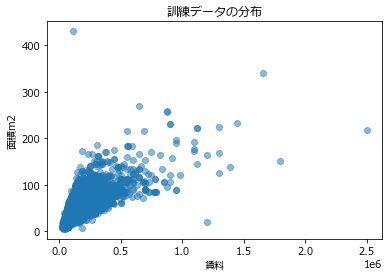

In [61]:
# ハズレ値の確認
import matplotlib.pyplot as plt
import numpy as np
font = {'family' : 'Meiryo'} # matplotlibのデフォルトフォントをTakaoGothicに設定
plt.rc('font', **font)
plt.scatter(train_data_1["賃料"], train_data_1["面積m2"], alpha = 0.5)
plt.title("訓練データの分布")
plt.xlabel('賃料')
plt.ylabel('面積m2')
plt.show()

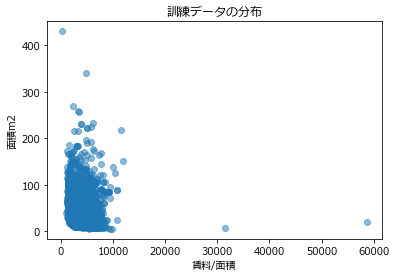

In [62]:
font = {'family' : 'Meiryo'} # matplotlibのデフォルトフォントをTakaoGothicに設定
plt.rc('font', **font)
plt.scatter(train_data_1["賃料/面積"], train_data_1["面積m2"], alpha = 0.5)
plt.title("訓練データの分布")
plt.xlabel('賃料/面積')
plt.ylabel('面積m2')
plt.show()

In [63]:
train_data_1.loc[train_data_1["賃料/面積"]>30000]

,id,賃料,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,賃料/面積,平均坪単価（万円）,方角ID,flag
5775,5776,1203500,12.416667,20.53,2,10.0,15.0,139.756843,35.664231,1.0,20.530000,0.666667,3,58621.529469,867.0,3,1.0
7491,7492,184000,0.166667,5.83,13,8.0,11.0,139.683483,35.728822,3.5,1.665714,0.727273,3,31560.891938,191.0,4,NaN


In [64]:
# ハズレ値の除去
print("除去前:",len(train_data_1))
train_data_1 = train_data_1.drop(5093, axis=0)
train_data_1 = train_data_1.drop(20643, axis=0)
train_data_1 = train_data_1.drop(30539, axis=0)

train_data_1 = train_data_1.drop(5775, axis=0)

train_data_1 = train_data_1.drop(20926, axis=0)

train_data_1 = train_data_1.drop(7491, axis=0)
print("除去後:",len(train_data_1))

除去前: 31470
除去後: 31464


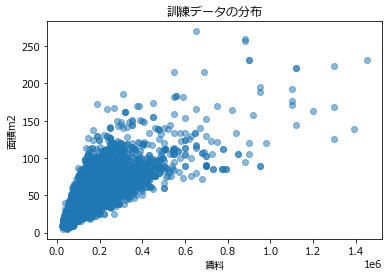

In [65]:
font = {'family' : 'Meiryo'} # matplotlibのデフォルトフォントをTakaoGothicに設定
plt.rc('font', **font)
plt.scatter(train_data_1["賃料"], train_data_1["面積m2"], alpha = 0.5)
plt.title("訓練データの分布")
plt.xlabel('賃料')
plt.ylabel('面積m2')
plt.show()

## 3. データチェック

In [66]:
train_data_1.isnull().sum()

id                0
賃料                0
築年数             889
面積m2              0
間取りID             0
所在              120
階層              594
経度                0
緯度                0
部屋数               0
1部屋当たり面積m2        0
高さ率             714
建物構造ID            0
賃料/面積             0
平均坪単価（万円）         0
方角ID              0
flag          25971
dtype: int64

In [67]:
test_data_1.isnull().sum()

id                0
築年数             675
面積m2              0
間取りID             0
所在              102
階層              476
経度                0
緯度                0
部屋数               0
1部屋当たり面積m2        0
高さ率             577
建物構造ID            0
平均坪単価（万円）         0
方角ID              0
flag          24812
dtype: int64

In [68]:
len(train_data_1)

31464

In [69]:
len(train_data)

31470

In [70]:
len(test_data_1)

24812

In [71]:
len(test_data)

31262

In [72]:
train_data_1.head()

,id,賃料,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,賃料/面積,平均坪単価（万円）,方角ID,flag
0,1,75000,9.750000,20.01,2,1.0,12.0,139.727873,35.747759,1.0,20.01,0.083333,3,3748.125937,180.0,5,NaN
1,2,76000,44.833333,16.50,8,5.0,10.0,139.780485,35.662406,1.0,16.50,0.500000,10,4606.060606,323.0,0,1.0
2,3,110000,8.500000,22.05,2,12.0,15.0,139.667375,35.675358,1.0,22.05,0.800000,3,4988.662132,324.0,4,NaN
3,4,150000,29.333333,60.48,13,3.0,4.0,139.648495,35.700193,3.5,17.28,0.750000,3,2480.158730,253.0,4,NaN
4,5,74000,31.583333,39.66,9,1.0,2.0,139.872315,35.766413,3.0,13.22,0.500000,7,1865.859808,111.0,4,NaN


In [73]:
test_data_1.head()

,id,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,平均坪単価（万円）,方角ID,flag
0,31471,49.000000,50.22,13,8.0,8.0,139.652762,35.617708,3.5,14.348571,1.00,10,208.0,4,NaN
1,31472,0.166667,20.88,8,3.0,4.0,139.672871,35.617709,1.0,20.880000,0.75,3,273.0,5,NaN
2,31473,23.333333,26.93,2,1.0,4.0,139.709049,35.741996,1.0,26.930000,0.25,10,186.0,5,NaN
3,31474,36.166667,23.57,2,1.0,2.0,139.658270,35.673602,1.0,23.570000,0.50,7,184.0,5,NaN
5,31476,25.500000,21.45,8,1.0,2.0,139.686023,35.691395,1.0,21.450000,0.50,7,294.0,8,NaN


## 4.学習 

In [74]:
# IDとflagの削除
train_data_1_no_ID = train_data_1.drop(["id", "flag"], axis=1)
test_data_1_no_ID = test_data_1.drop(["id", "flag"], axis=1)

In [75]:
# 特徴データと目的変数の設定
train_x = train_data_1_no_ID.drop(["賃料", "賃料/面積"], axis=1)
train_y = train_data_1_no_ID["賃料/面積"]

test_x = test_data_1_no_ID

In [76]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold

scores = []
# GBDT用のハイパーパラメータ
params = {"objective": "reg:squarederror", "sileng":1, "random_state":71, "eval_metric":"rmse"}
num_round = 50

# クロスバリデーション
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx, in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
    # GBDTで学習実行
    dtrain = xgb.DMatrix(tr_x, tr_y) # enable_categorical=True
    dvalid = xgb.DMatrix(va_x, va_y)
    dtest = xgb.DMatrix(test_x)
    
    watchlist = [(dtrain, "train"), (dvalid, "eval")]
    model = xgb.train(params, dtrain, num_round, evals=watchlist)

[10:48:43] WARNING: ..\src\learner.cc:541: 
Parameters: { sileng } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:2614.46143	eval-rmse:2600.12134
[1]	train-rmse:1865.57642	eval-rmse:1856.67664
[2]	train-rmse:1347.49255	eval-rmse:1344.94177
[3]	train-rmse:994.48029	eval-rmse:996.51105
[4]	train-rmse:758.21088	eval-rmse:765.06158
[5]	train-rmse:605.00415	eval-rmse:617.74219
[6]	train-rmse:508.47687	eval-rmse:525.71033
[7]	train-rmse:449.03668	eval-rmse:470.43515
[8]	train-rmse:411.91965	eval-rmse:437.03247
[9]	train-rmse:392.01434	eval-rmse:419.26639
[10]	train-rmse:375.96390	eval-rmse:406.09424
[11]	train-rmse:367.81455	eval-rmse:399.24881
[12]	train-rmse:359.54636	eval-rmse:392.51697
[13]	train-rmse:354.69723	eval-rmse:389.83578
[14]	train-rmse:349.59589	eval-rms

## 5. 検証

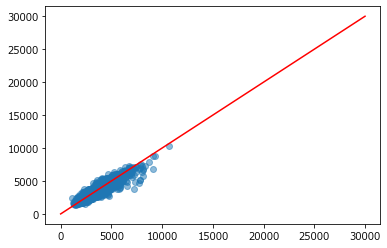

In [77]:
# 訓練データの予測結果の可視化
import matplotlib.pyplot as plt
import numpy as np
pred = model.predict(xgb.DMatrix(va_x), ntree_limit = model.best_ntree_limit)
plt.scatter(va_y, pred, alpha = 0.5)
plt.plot(np.linspace(0, 30000, 30000), np.linspace(0, 30000, 30000), "red")
plt.show()

In [78]:
# 訓練データのRMSEの出力
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(va_y, pred)
rmse = np.sqrt(mse)
print(rmse)

340.1171950208885


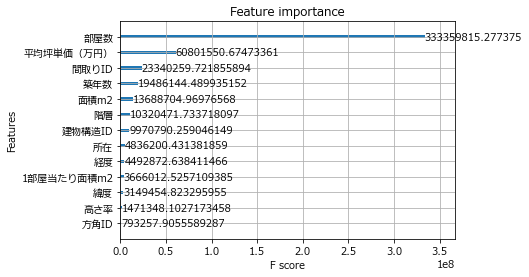

In [79]:
# 特徴量の予測結果への貢献度(Fスコア)を可視化
font = {'family' : 'Meiryo'} # matplotlibのデフォルトフォントをTakaoGothicに設定
plt.rc('font', **font)
xgb.plot_importance(model, importance_type = "gain")
plt.show()

## 6. 予測

In [80]:
# テストデータでの予測
pred = model.predict(dtest, ntree_limit = model.best_ntree_limit)

In [81]:
pred

array([2529.432 , 5305.914 , 3063.8977, ..., 4537.7656, 3768.5083,
       3704.551 ], dtype=float32)

In [82]:
len(pred)

24812

In [83]:
len(test_data_1)

24812

## 7. データ出力

In [84]:
# 予測結果の結合
test_data_1["賃料/面積"] = pred

In [85]:
# 予測結果から賃料を算出し、int型に変換
test_data_1["賃料"] = (test_data_1["面積m2"] * test_data_1["賃料/面積"]).astype(int)

In [86]:
result = test_data_1[["id", "賃料"]]

In [87]:
result

,id,賃料
0,31471,127028
1,31472,110787
2,31473,82510
3,31474,62710
5,31476,70825
...,...,...
31255,62726,109689
31257,62728,111418
31258,62729,103052
31259,62730,172446


In [88]:
len(result)

24812

In [89]:
# 除外していた重複idの賃料を戻す
test_duplicate_rentvalue = pd.read_excel("test_duplicate_rentvalue.xlsx")
result = pd.concat([result, test_duplicate_rentvalue])
result = result.sort_values("id")
len(result)

31262

In [90]:
result

,id,賃料
0,31471,127028
1,31472,110787
2,31473,82510
3,31474,62710
0,31475,90000
...,...,...
31257,62728,111418
31258,62729,103052
31259,62730,172446
6449,62731,280000


In [91]:
result.to_csv("result.csv", header=False, index=False)